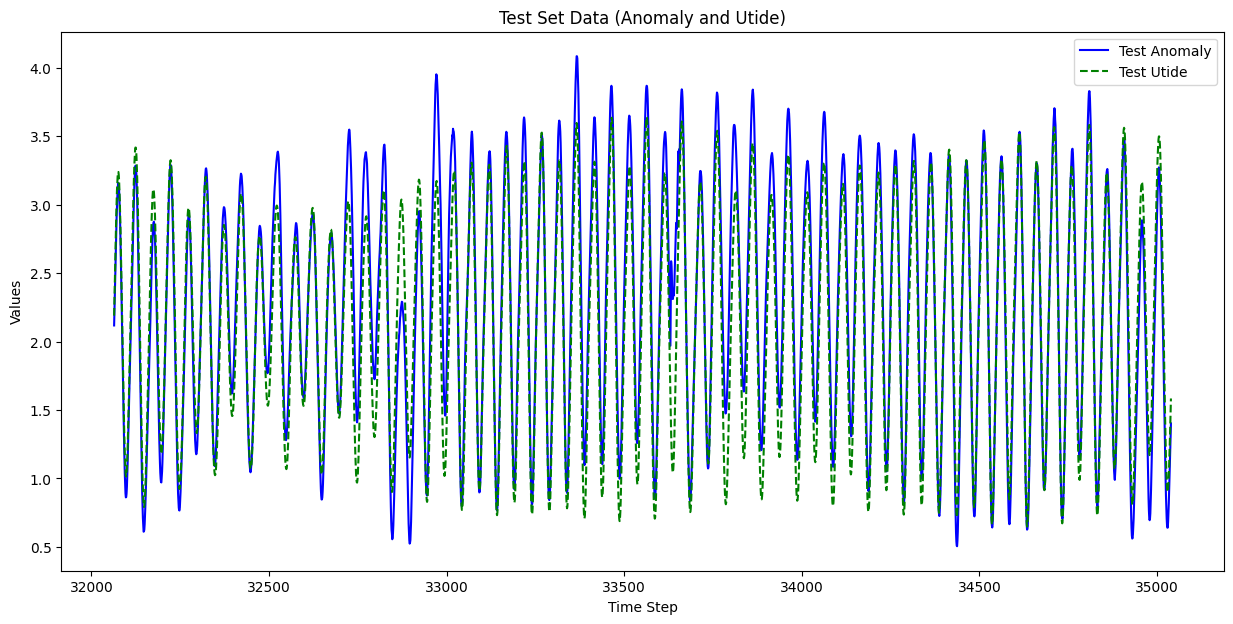

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

input_file = "dataProcessed/MIL2019_HA.csv"
df = pd.read_csv(input_file, delimiter=',')

total_train = 31964
look_back = 100
show_points = 2976
total_test = 2976
start_index = 0

test_start_index = start_index + total_train + look_back
test_end_index = test_start_index + show_points

if len(df) < test_end_index:
    raise ValueError(f"Dataset too small. Required: {test_end_index}, Current: {len(df)}")

test_anomaly = df['anomaly'][test_start_index:test_end_index].values
test_utide = df['tide_h'][test_start_index:test_end_index].values

plt.figure(figsize=(15, 7))
plt.plot(range(test_start_index, test_end_index), test_anomaly, label='Test Anomaly', color='blue')
plt.plot(range(test_start_index, test_end_index), test_utide, label='Test Utide', color='green', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Values')
plt.title('Test Set Data (Anomaly and Utide)')
plt.legend()
plt.show()

R² score of Utide vs Anomaly: 0.9064


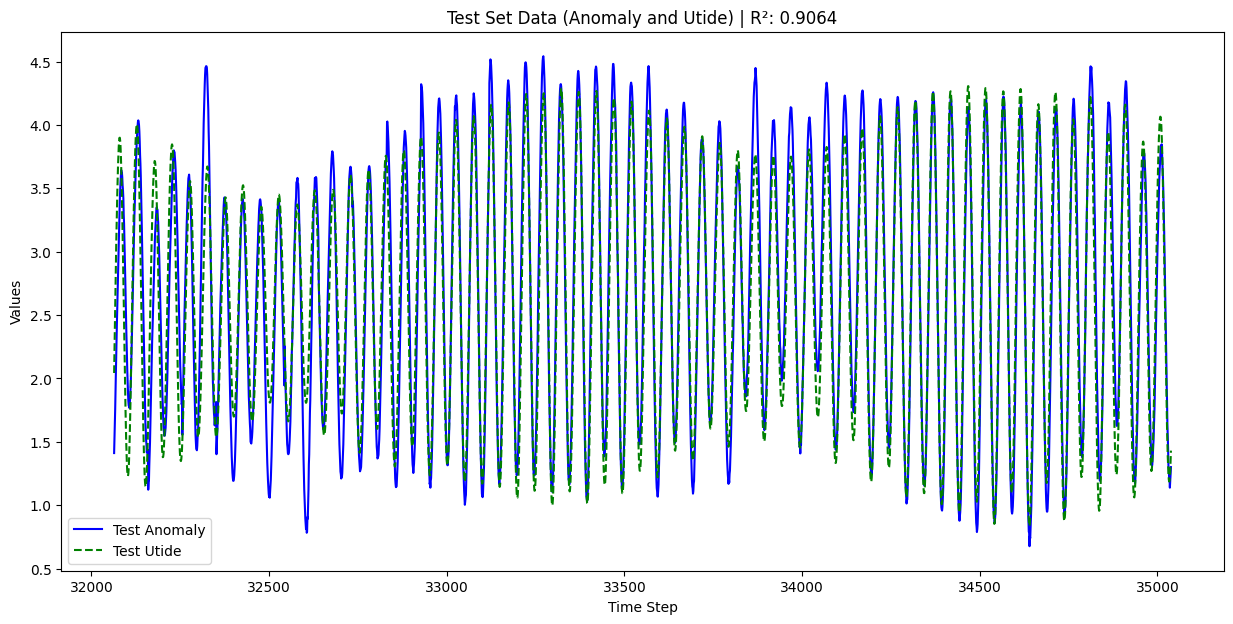

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

input_file = "dataProcessed/ABE2018_HA1.csv"
df = pd.read_csv(input_file, delimiter=',')

total_train = 31964
look_back = 100
show_points = 2975
total_test = 2976
start_index = 0

test_start_index = start_index + total_train + look_back
test_end_index = test_start_index + show_points

test_anomaly = df['anomaly'][test_start_index:test_end_index].values
test_utide = df['tide_h'][test_start_index:test_end_index].values

r2_utide = r2_score(test_anomaly, test_utide)

print(f"R² score of Utide vs Anomaly: {r2_utide:.4f}")

plt.figure(figsize=(15, 7))
plt.plot(range(test_start_index, test_end_index), test_anomaly, label='Test Anomaly', color='blue')
plt.plot(range(test_start_index, test_end_index), test_utide, label='Test Utide', color='green', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Values')
plt.title(f'Test Set Data (Anomaly and Utide) | R²: {r2_utide:.4f}')
plt.legend()
plt.show()

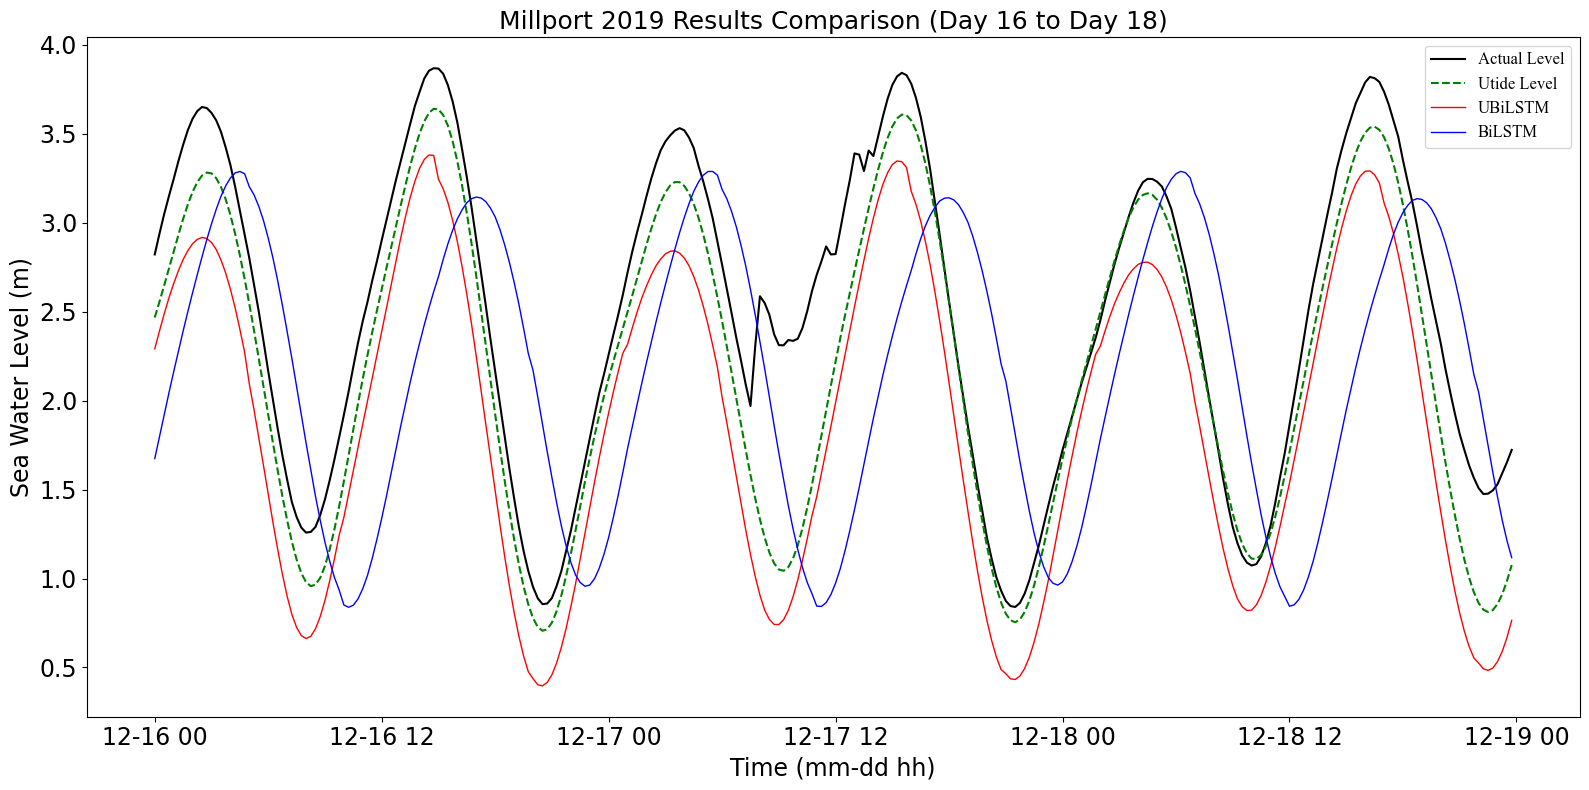

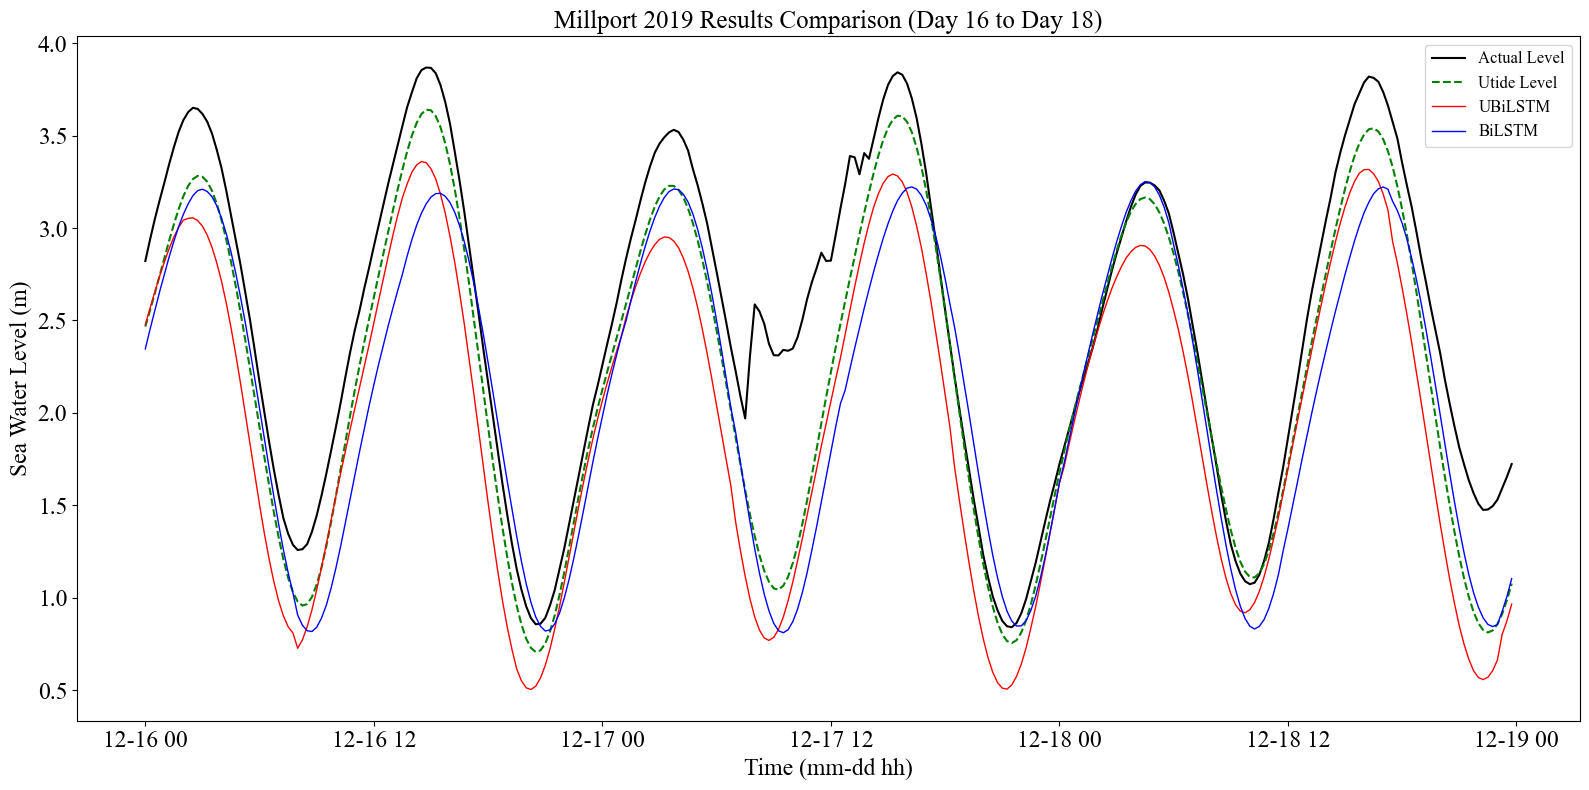

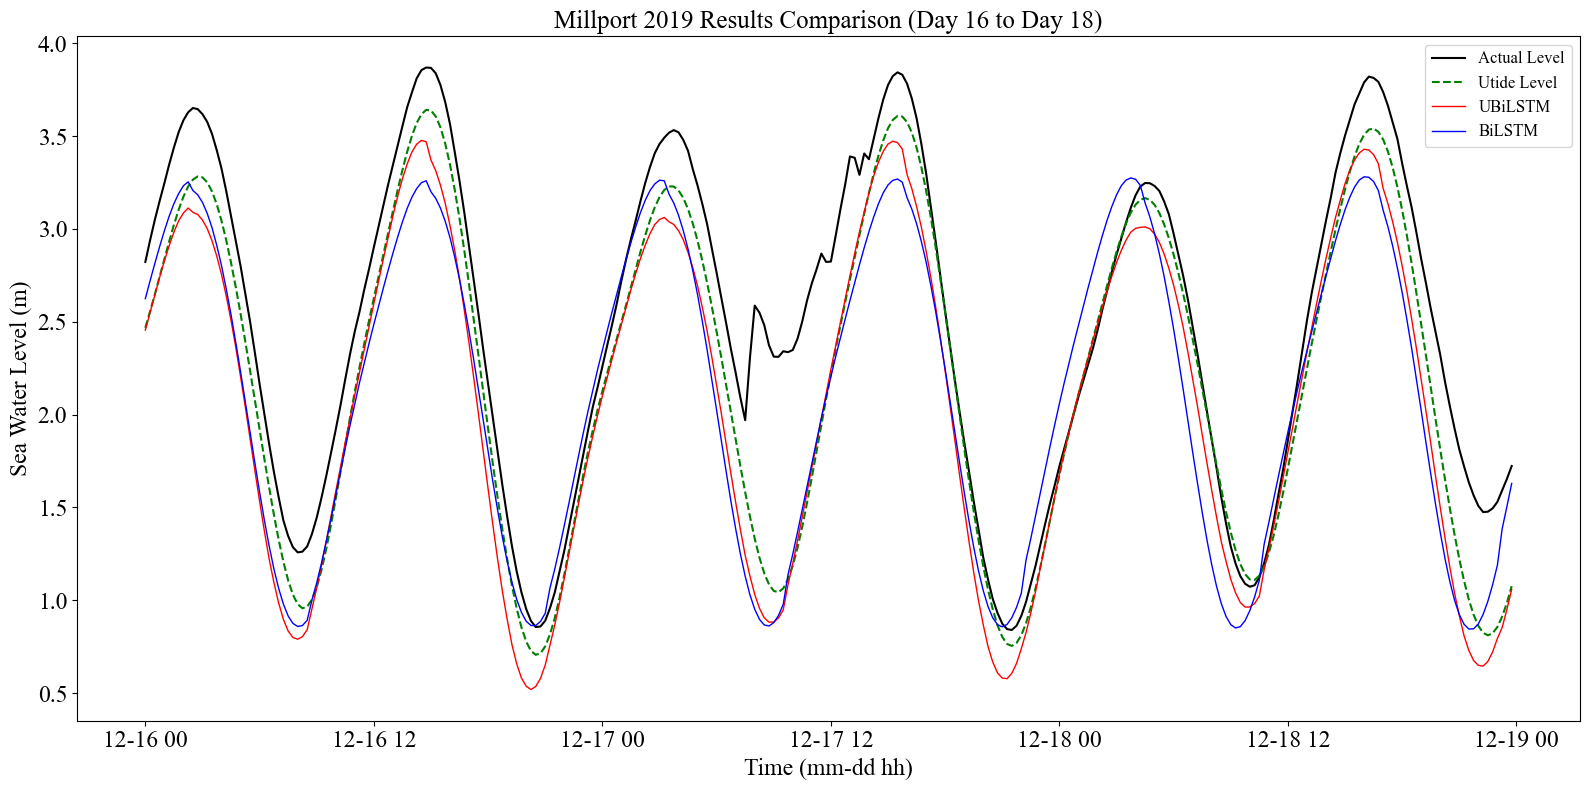

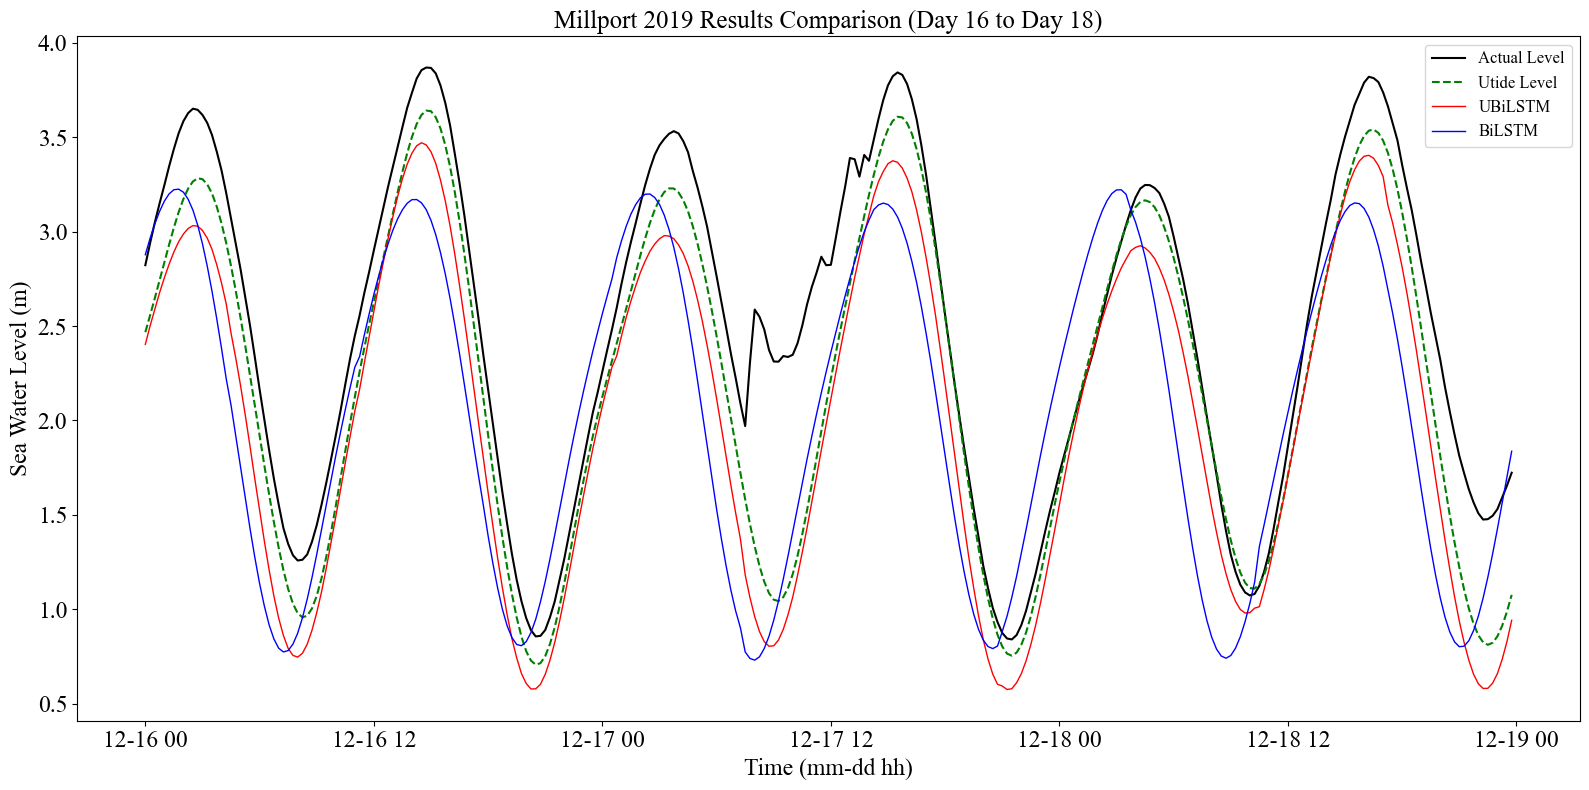

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

with_utide = "Final_data/MIL2019_utide(20,23,25,27)(11finalfinal).csv" 
without = "Final_data/MIL2019multi(20,23,25,27)(11final).csv"  

data1 = pd.read_csv(with_utide)
data2 = pd.read_csv(without)

required_columns = ['future_steps', 'Time_Step', 'Actual_Values', 'Predicted_Values', 'Utide_Values']


future_steps_list = sorted(data1['future_steps'].unique())
interval_minutes = 15  
rows_per_day = 24 * 60 // interval_minutes
#range
start_day = 16
end_day = 18
start_index = (start_day - 1) * rows_per_day
end_index = end_day * rows_per_day

for future_step in future_steps_list:
    subset1 = data1[data1['future_steps'] == future_step]
    subset2 = data2[data2['future_steps'] == future_step]

    subset1 = subset1.iloc[start_index:end_index]
    subset2 = subset2.iloc[start_index:end_index]

    start_time = pd.Timestamp("2019-12-01 00:00:00") 
    time_range = [start_time + timedelta(minutes=i * interval_minutes) for i in range(start_index, end_index)]

    actual_values = subset1['Actual_Values'].values
    predicted_values1 = subset1['Predicted_Values'].values
    predicted_values2 = subset2['Predicted_Values'].values
    utide_values = subset1['Utide_Values'].values

    plt.figure(figsize=(16, 8))
    plt.plot(time_range, actual_values, label='Actual Level', color='black', linestyle='-', linewidth=1.5)
    plt.plot(time_range, utide_values, label='Utide Level', color='green', linestyle='--', linewidth=1.5)
    plt.plot(time_range, predicted_values1, label=f'UBiLSTM', color='red', linewidth=1)
    plt.plot(time_range, predicted_values2, label=f'BiLSTM', color='blue', linewidth=1)

    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    plt.title(f'Millport 2019 Results Comparison (Day {start_day} to Day {end_day})', fontsize=18)

    # plt.title(f'Millport 2023 Results Comparison (Day {start_day} to Day {end_day}), (Recursive prediction with {future_step} output timesteps)', fontsize=18)
    plt.xlabel('Time (mm-dd hh)', fontsize=17)
    plt.ylabel('Sea Water Level (m)', fontsize=17)
    plt.xticks(rotation=0)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

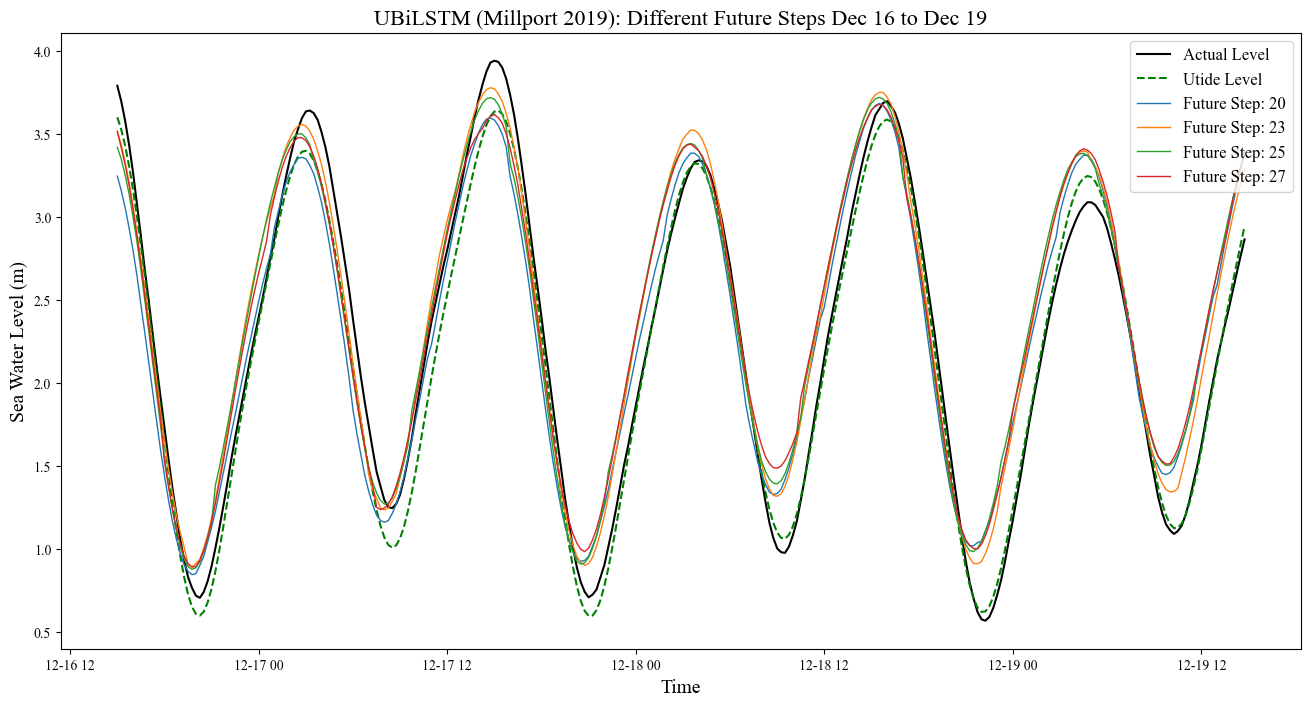

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

with_utide = "Final_data/MIL2023_utide(20,23,25,27)(0.5_0.5final).csv"
data = pd.read_csv(with_utide)

required_columns = ['future_steps', 'Time_Step', 'Actual_Values', 'Predicted_Values', 'Utide_Values']

future_steps_list = sorted(data['future_steps'].unique())

interval_minutes = 15 
rows_per_day = 24 * 60 // interval_minutes  
num_days = 3 
start_index = 1500 

first_fs = future_steps_list[0]
subset_first = data[data['future_steps'] == first_fs]

subset_first_segment = subset_first.iloc[start_index:start_index + rows_per_day * num_days].reset_index(drop=True)

start_time = pd.Timestamp("2019-12-01 00:00:00")
start_time_segment = start_time + timedelta(minutes=start_index * interval_minutes)
time_range = [start_time_segment + timedelta(minutes=i * interval_minutes) for i in range(len(subset_first_segment))]

actual_values = subset_first_segment['Actual_Values'].values
utide_values = subset_first_segment['Utide_Values'].values

plt.figure(figsize=(16, 8))

plt.plot(time_range, actual_values, label='Actual Level', color='black', linestyle='-', linewidth=1.5)

plt.plot(time_range, utide_values, label='Utide Level', color='green', linestyle='--', linewidth=1.5)

for future_step in future_steps_list:
    subset_fs = data[data['future_steps'] == future_step]
    subset_fs_segment = subset_fs.iloc[start_index:start_index + rows_per_day * num_days].reset_index(drop=True)
    predicted_values = subset_fs_segment['Predicted_Values'].values
    plt.plot(time_range, predicted_values, label=f'Future Step: {future_step}', linewidth=1)

plt.title(f'UBiLSTM (Millport 2019): Different Future Steps Dec 16 to Dec 19', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Sea Water Level (m)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(fontsize=12)
plt.show()

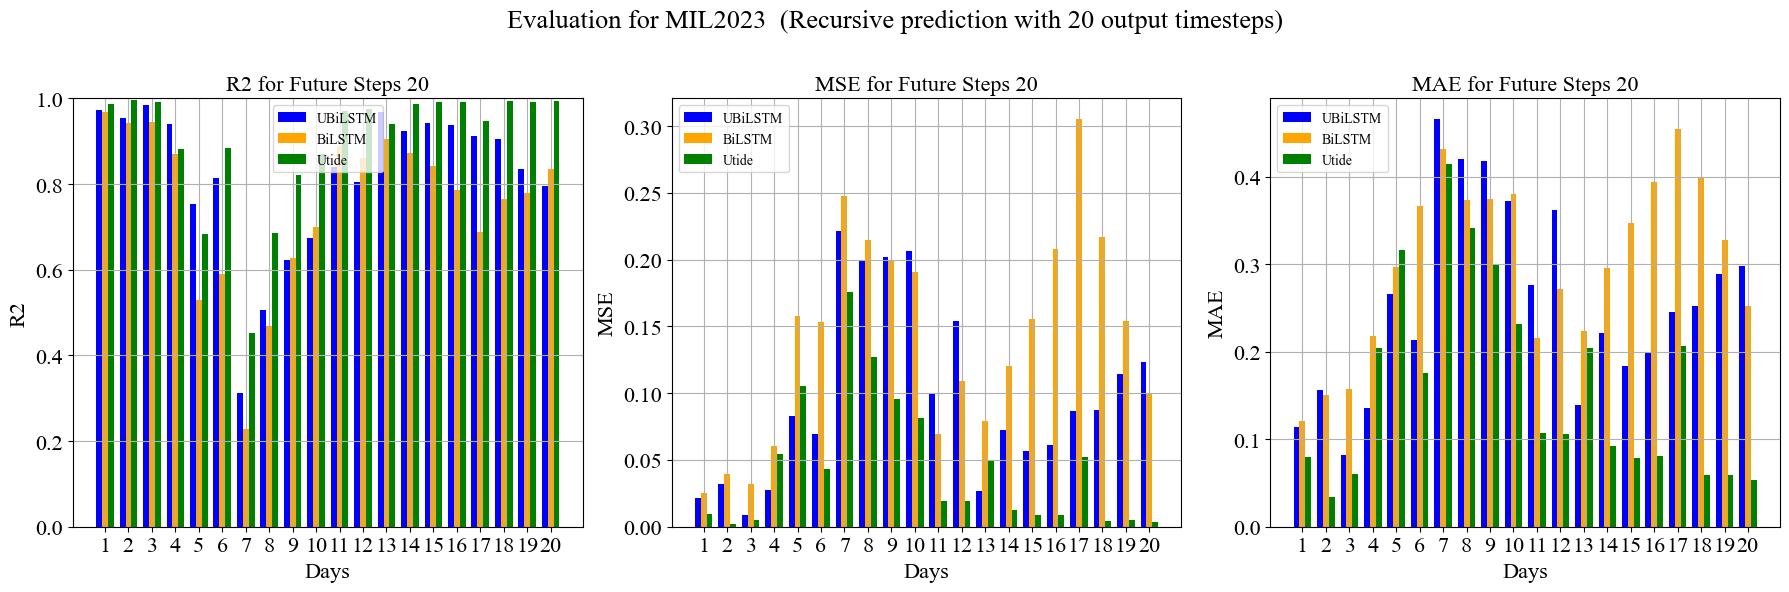

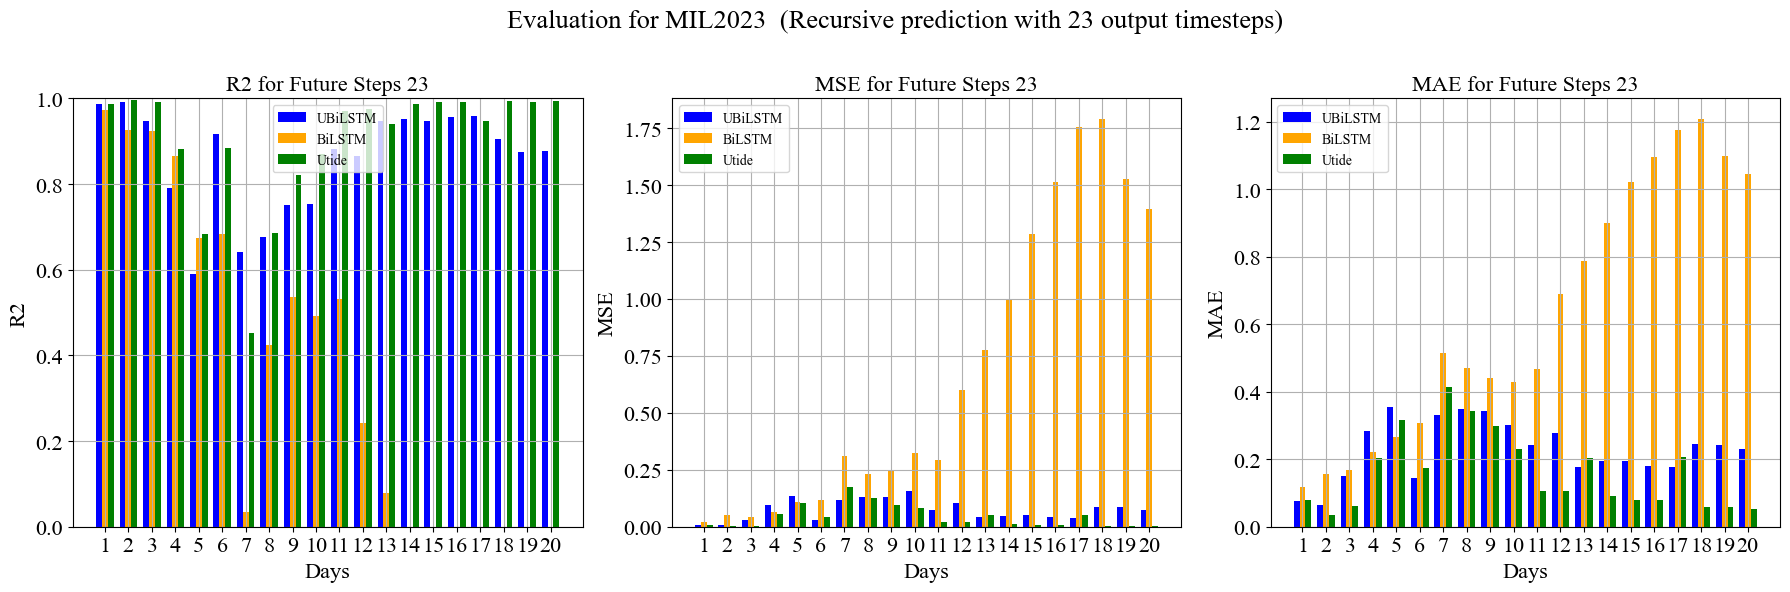

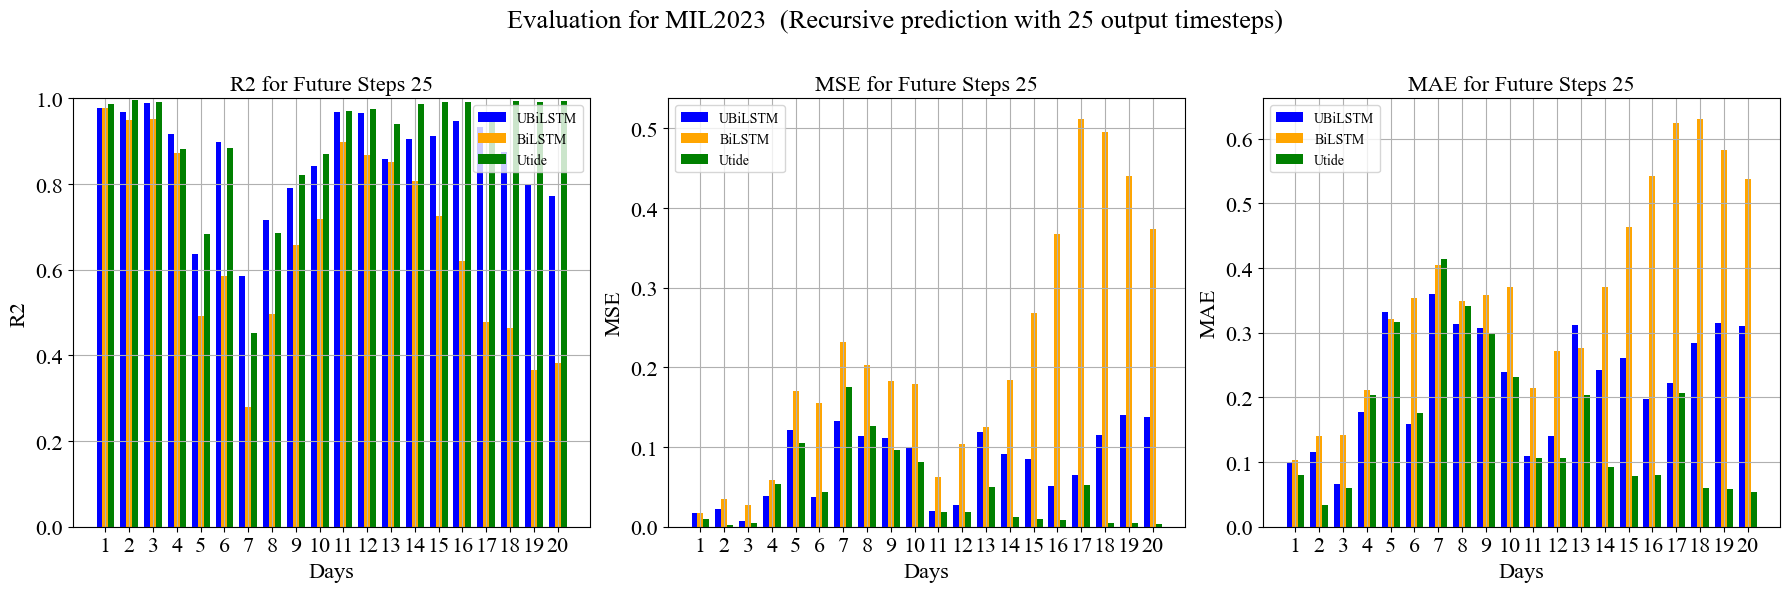

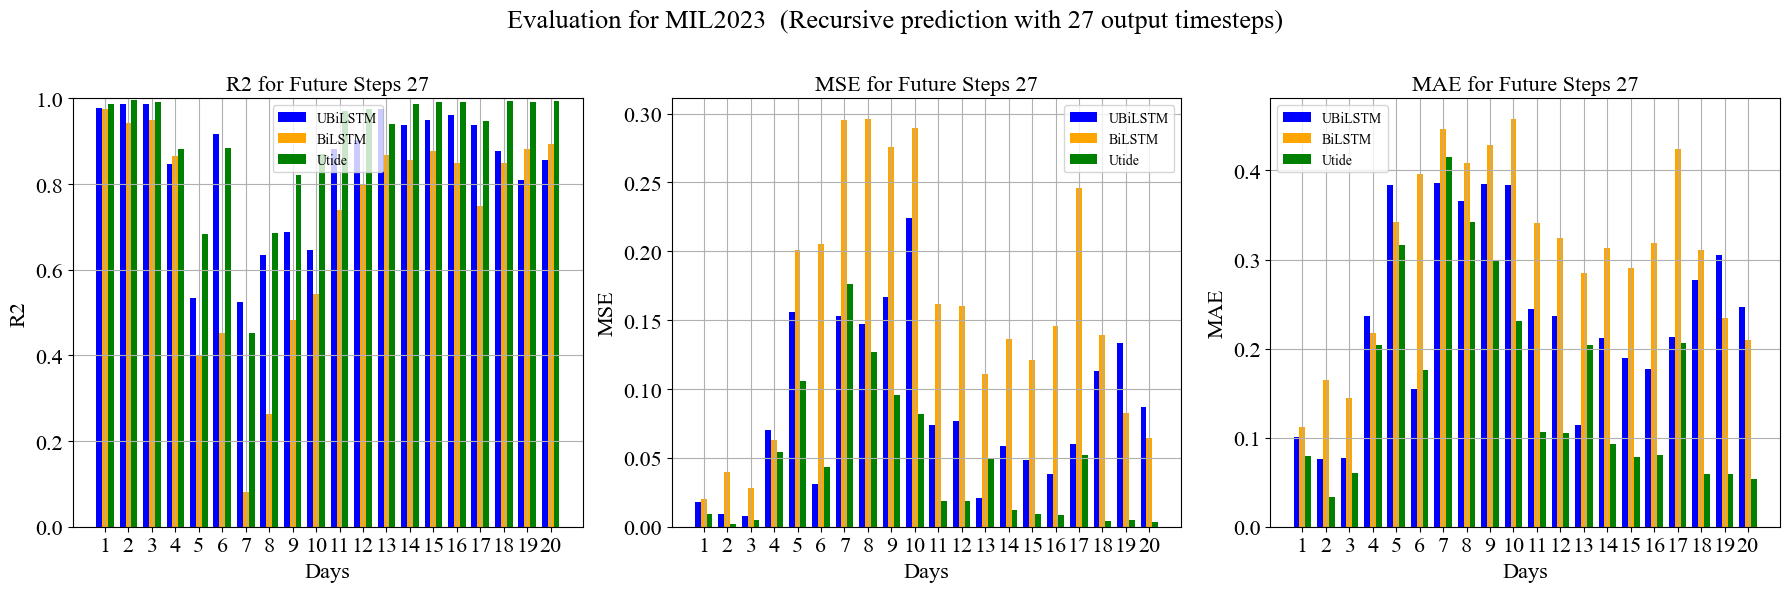

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime, timedelta

file_with_utide = "Final_data/MIL2023_utide(20,23,25,27)(0.5_0.5final).csv"
file_without_utide = "Final_data/MILmulti2023(20,23,25,27)(0.5_0.5final).csv"

data_with_utide = pd.read_csv(file_with_utide)
data_without_utide = pd.read_csv(file_without_utide)

required_columns = ['future_steps', 'Time_Step', 'Actual_Values', 'Predicted_Values', 'Utide_Values']

rows_per_day = 96
num_days =20 

results = []

future_steps_list = sorted(data_with_utide['future_steps'].unique())
for future_steps in future_steps_list:
    subset_with_utide = data_with_utide[data_with_utide['future_steps'] == future_steps]
    subset_without_utide = data_without_utide[data_without_utide['future_steps'] == future_steps]

    for day in range(num_days):
        start_idx = day * rows_per_day
        end_idx = start_idx + rows_per_day

        daily_data_with_utide = subset_with_utide.iloc[start_idx:end_idx]
        daily_data_without_utide = subset_without_utide.iloc[start_idx:end_idx]

        if len(daily_data_with_utide) == rows_per_day and len(daily_data_without_utide) == rows_per_day:
            actual = daily_data_with_utide['Actual_Values'].values
            predicted_with_utide = daily_data_with_utide['Predicted_Values'].values
            predicted_without_utide = daily_data_without_utide['Predicted_Values'].values
            utide_values = daily_data_with_utide['Utide_Values'].values

            r2_with_utide = r2_score(actual, predicted_with_utide)
            mse_with_utide = mean_squared_error(actual, predicted_with_utide)
            mae_with_utide = mean_absolute_error(actual, predicted_with_utide)

            r2_without_utide = r2_score(actual, predicted_without_utide)
            mse_without_utide = mean_squared_error(actual, predicted_without_utide)
            mae_without_utide = mean_absolute_error(actual, predicted_without_utide)

            r2_utide = r2_score(actual, utide_values)
            mse_utide = mean_squared_error(actual, utide_values)
            mae_utide = mean_absolute_error(actual, utide_values)

            results.append({
                'future_steps': future_steps,
                'day': day + 1,
                'r2_with_utide': r2_with_utide,
                'mse_with_utide': mse_with_utide,
                'mae_with_utide': mae_with_utide,
                'r2_without_utide': r2_without_utide,
                'mse_without_utide': mse_without_utide,
                'mae_without_utide': mae_without_utide,
                'r2_utide': r2_utide,
                'mse_utide': mse_utide,
                'mae_utide': mae_utide,
            })

# DataFrame
results_df = pd.DataFrame(results)

metrics = ['R2', 'MSE', 'MAE']
for future_steps in future_steps_list:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    plot_data = results_df[results_df['future_steps'] == future_steps]

    for i, metric in enumerate(metrics):
        metric_with_utide = plot_data[f'{metric.lower()}_with_utide'].values
        metric_without_utide = plot_data[f'{metric.lower()}_without_utide'].values
        metric_utide = plot_data[f'{metric.lower()}_utide'].values
        x_labels = [f'{d}' for d in plot_data['day']]
        x = np.arange(len(x_labels))
        width = 0.25

        axes[i].bar(x - width, metric_with_utide, width, label='UBiLSTM', color='blue')
        axes[i].bar(x, metric_without_utide, width, label='BiLSTM', color='orange')
        axes[i].bar(x + width, metric_utide, width, label='Utide', color='green')
        axes[i].set_title(f'{metric} for Future Steps {future_steps}', fontsize=16)
        axes[i].tick_params(axis='both', labelsize=16)
        axes[i].set_xticks(x)
        axes[i].set_xticklabels(x_labels, rotation=0, fontsize=16)
        axes[i].set_xlabel('Days', fontsize=16)
        axes[i].set_ylabel(metric, fontsize=16)
        axes[i].legend()
        axes[i].grid(True)
        if metric == 'R2':
            axes[i].set_ylim(0, 1)

    plt.suptitle(f'Evaluation for MIL2023  (Recursive prediction with {future_steps} output timesteps)', fontsize=19)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

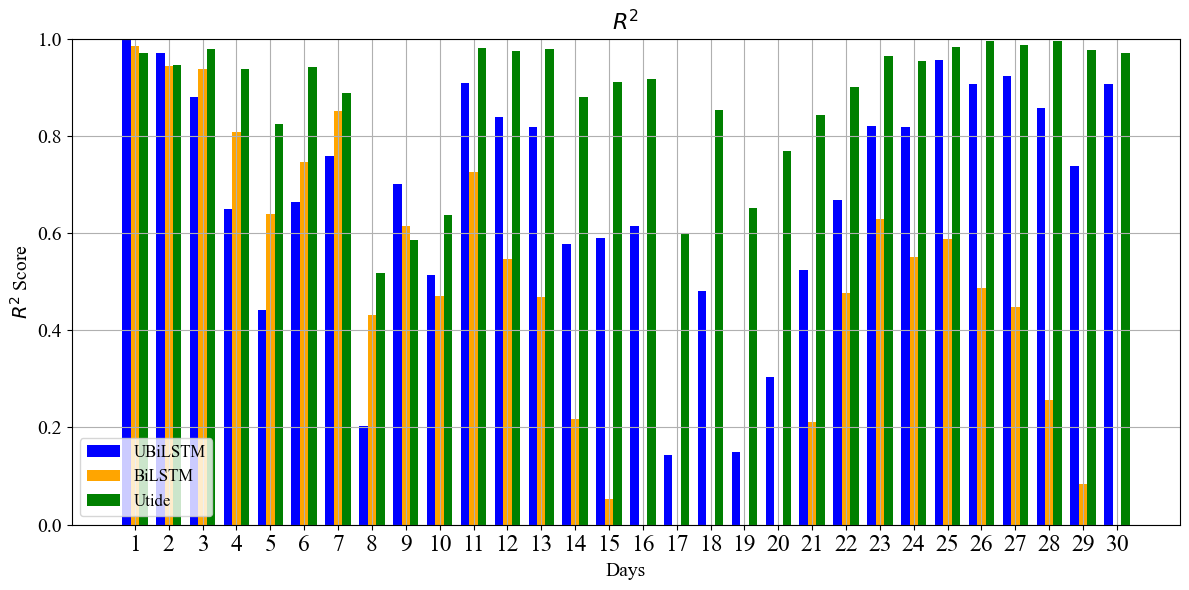

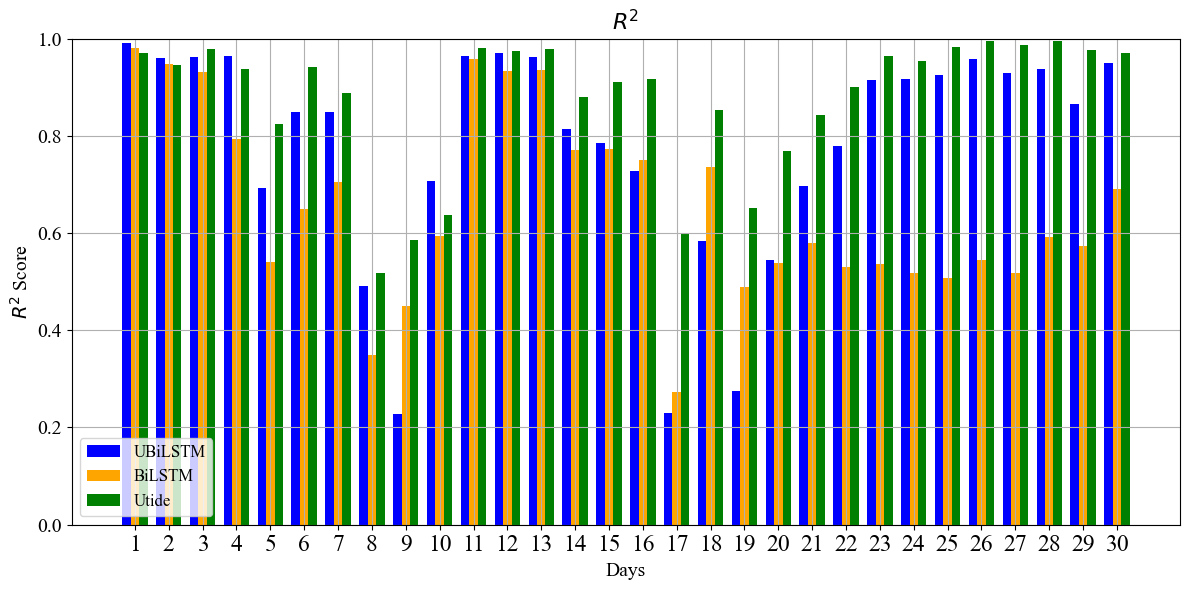

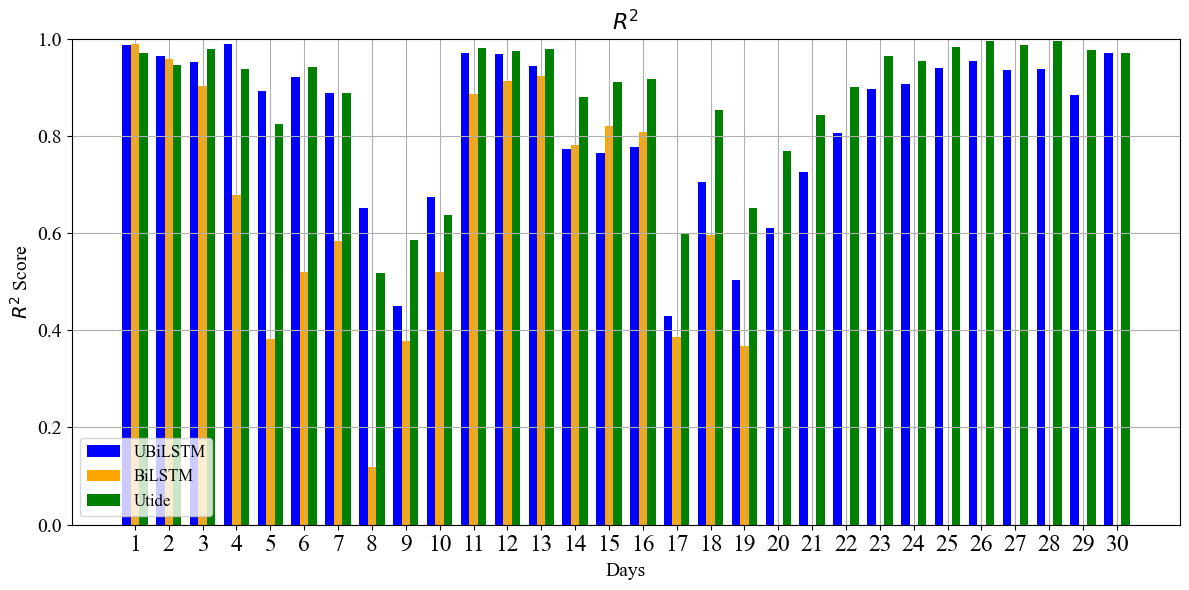

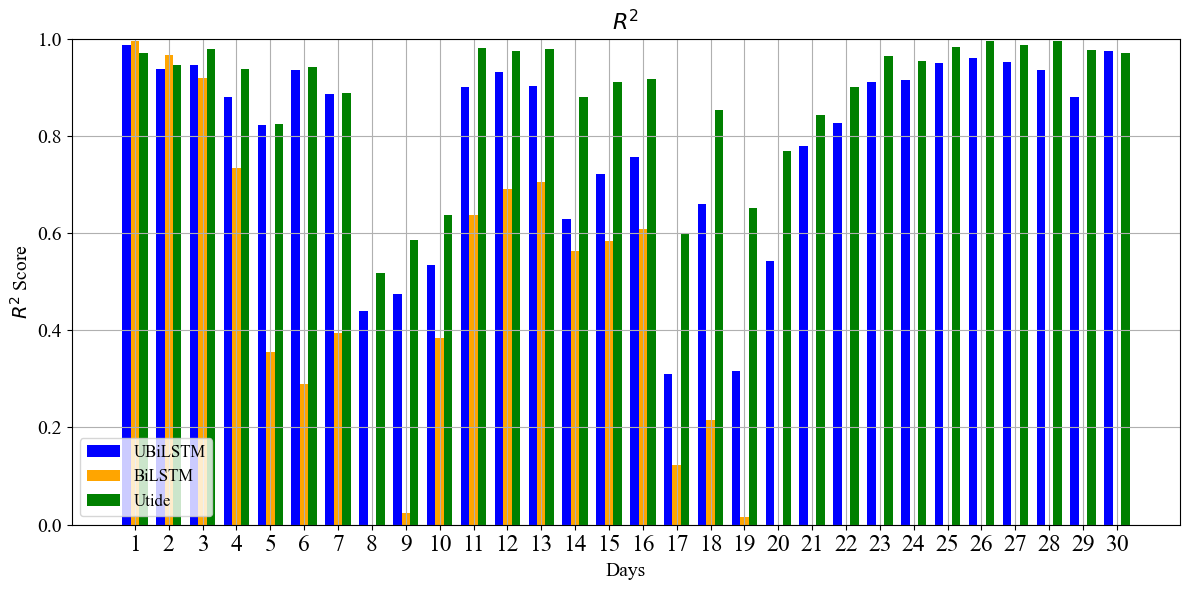

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from datetime import timedelta

file_with_utide = "Final_data/MIL2019_utide(20,23,25,27)(11finalfinal).csv"
file_without_utide = "Final_data/MIL2019multi(20,23,25,27)(11final).csv"

data_with_utide = pd.read_csv(file_with_utide)
data_without_utide = pd.read_csv(file_without_utide)

required_columns = ['future_steps', 'Time_Step', 'Actual_Values', 'Predicted_Values', 'Utide_Values']
rows_per_day = 96
num_days = 30 

results = []

future_steps_list = sorted(data_with_utide['future_steps'].unique())
for future_steps in future_steps_list:
    subset_with_utide = data_with_utide[data_with_utide['future_steps'] == future_steps]
    subset_without_utide = data_without_utide[data_without_utide['future_steps'] == future_steps]

    for day in range(num_days):
        start_idx = day * rows_per_day
        end_idx = start_idx + rows_per_day

        daily_data_with_utide = subset_with_utide.iloc[start_idx:end_idx]
        daily_data_without_utide = subset_without_utide.iloc[start_idx:end_idx]

        if len(daily_data_with_utide) == rows_per_day and len(daily_data_without_utide) == rows_per_day:
            actual = daily_data_with_utide['Actual_Values'].values
            predicted_with_utide = daily_data_with_utide['Predicted_Values'].values
            predicted_without_utide = daily_data_without_utide['Predicted_Values'].values
            utide_values = daily_data_with_utide['Utide_Values'].values

            r2_with_utide = r2_score(actual, predicted_with_utide)
            r2_without_utide = r2_score(actual, predicted_without_utide)
            r2_utide = r2_score(actual, utide_values)

            results.append({
                'future_steps': future_steps,
                'day': day + 1,
                'r2_with_utide': r2_with_utide,
                'r2_without_utide': r2_without_utide,
                'r2_utide': r2_utide,
            })

results_df = pd.DataFrame(results)

for future_steps in future_steps_list:
    plt.figure(figsize=(12, 6))
    plot_data = results_df[results_df['future_steps'] == future_steps]

    r2_with_utide = plot_data['r2_with_utide'].values
    r2_without_utide = plot_data['r2_without_utide'].values
    r2_utide = plot_data['r2_utide'].values
    x_labels = [f'{d}' for d in plot_data['day']]
    x = np.arange(len(x_labels))
    width = 0.25

    plt.bar(x - width, r2_with_utide, width, label='UBiLSTM', color='blue')
    plt.bar(x, r2_without_utide, width, label='BiLSTM', color='orange')
    plt.bar(x + width, r2_utide, width, label='Utide', color='green')
    # # font = {'fsmily': 'serif',
    #         'serif': 'Times New Roman',
    #         'weight': 'normal',
    #         'size': 10}
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman']
    plt.title(f'$R^2$', fontsize=16)
    plt.xlabel('Days', fontsize=14)
    plt.ylabel('$R^2$ Score', fontsize=14)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=14)
    plt.xticks(x, x_labels, rotation=0)
    plt.ylim(0, 1)
    plt.legend(loc='lower left', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [90]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 250 kB 9.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# xlsx file

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

file_with_utide = "ABE_data/MIL2023_utide(20,23,25,27)(0.5_0.5final).csv"  # 替换为你的文件路径
file_without_utide = "ABE_data/MILmulti2023(20,23,25,27)(0.5_0.5final).csv"  # 替换为你的文件路径



def calculate_segmented_scores(actual, predicted, step_size=100, max_steps=1000):
    r2_list, mse_list, mae_list = [], [], []

    for start in range(0, max_steps, step_size):
        end = start + step_size
        actual_seg = actual[start:end]
        predicted_seg = predicted[start:end]
        
        if len(actual_seg) > 0 and len(predicted_seg) > 0:
            r2 = r2_score(actual_seg, predicted_seg)
            mse = mean_squared_error(actual_seg, predicted_seg)
            mae = mean_absolute_error(actual_seg, predicted_seg)
        else:
            r2, mse, mae = np.nan, np.nan, np.nan
        
        r2_list.append(r2)
        mse_list.append(mse)
        mae_list.append(mae)

    r2_1000 = r2_score(actual[:max_steps], predicted[:max_steps])
    mse_1000 = mean_squared_error(actual[:max_steps], predicted[:max_steps])
    mae_1000 = mean_absolute_error(actual[:max_steps], predicted[:max_steps])

    r2_overall = r2_score(actual, predicted)
    mse_overall = mean_squared_error(actual, predicted)
    mae_overall = mean_absolute_error(actual, predicted)

    return r2_list, mse_list, mae_list, (r2_1000, mse_1000, mae_1000), (r2_overall, mse_overall, mae_overall)

df_with_utide = pd.read_csv(file_with_utide)
df_without_utide = pd.read_csv(file_without_utide)

future_steps = [20, 23, 25, 27]

results = {"Metrics": [f"{i}-{i+100} R²" for i in range(0, 1000, 100)] + ["0-1000 R²", "Overall R²"] + \
                       [f"{i}-{i+100} MSE" for i in range(0, 1000, 100)] + ["0-1000 MSE", "Overall MSE"] + \
                       [f"{i}-{i+100} MAE" for i in range(0, 1000, 100)] + ["0-1000 MAE", "Overall MAE"]}

# lstm Pred sith utide
for step in future_steps:
    subset = df_with_utide[df_with_utide['future_steps'] == step]
    actual = subset['Actual_Values'].values
    predicted = subset['Predicted_Values'].values
    r2_list, mse_list, mae_list, overall_1000, overall = calculate_segmented_scores(actual, predicted)
    results[f"UBilstm_{step}"] = r2_list + [overall_1000[0], overall[0]] + mse_list + [overall_1000[1], overall[1]] + mae_list + [overall_1000[2], overall[2]]

# LSTM Pred withouy utide
for step in future_steps:
    subset = df_without_utide[df_without_utide['future_steps'] == step]
    actual = subset['Actual_Values'].values
    predicted = subset['Predicted_Values'].values
    r2_list, mse_list, mae_list, overall_1000, overall = calculate_segmented_scores(actual, predicted)
    results[f"LSTM_{step}"] = r2_list + [overall_1000[0], overall[0]] + mse_list + [overall_1000[1], overall[1]] + mae_list + [overall_1000[2], overall[2]]

# Utide
subset = df_with_utide[df_with_utide['future_steps'] == future_steps[0]]  # 假设Utide不随步数变化
actual = subset['Actual_Values'].values
utide = subset['Utide_Values'].values
r2_list, mse_list, mae_list, overall_1000, overall = calculate_segmented_scores(actual, utide)
results["Utide"] = r2_list + [overall_1000[0], overall[0]] + mse_list + [overall_1000[1], overall[1]] + mae_list + [overall_1000[2], overall[2]]

results_df = pd.DataFrame(results)

results_df.to_excel("MIL2023_results_segmented.xlsx", index=False)


In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#44
file_with_utide = "Final_data/MIL2023_utide(20,23,25,27)(0.5_0.5final).csv"
file_without_utide = "Final_data/MILmulti2023(20,23,25,27)(0.5_0.5final).csv"

def calculate_daily_scores(actual, predicted, rows_per_day=96, num_days=10):
    r2_list, mse_list, mae_list = [], [], []

    for day in range(num_days):
        start = day * rows_per_day
        end = start + rows_per_day
        actual_day = actual[start:end]
        predicted_day = predicted[start:end]

        if len(actual_day) > 0 and len(predicted_day) > 0:
            r2 = r2_score(actual_day, predicted_day)
            mse = mean_squared_error(actual_day, predicted_day)
            mae = mean_absolute_error(actual_day, predicted_day)
        else:
            r2, mse, mae = np.nan, np.nan, np.nan

        r2_list.append(r2)
        mse_list.append(mse)
        mae_list.append(mae)

    # first 10 days
    actual_10days = actual[:rows_per_day * num_days]
    predicted_10days = predicted[:rows_per_day * num_days]
    r2_10days = r2_score(actual_10days, predicted_10days)
    mse_10days = mean_squared_error(actual_10days, predicted_10days)
    mae_10days = mean_absolute_error(actual_10days, predicted_10days)

    r2_overall = r2_score(actual, predicted)
    mse_overall = mean_squared_error(actual, predicted)
    mae_overall = mean_absolute_error(actual, predicted)

    return r2_list, mse_list, mae_list, (r2_10days, mse_10days, mae_10days), (r2_overall, mse_overall, mae_overall)

df_with_utide = pd.read_csv(file_with_utide)
df_without_utide = pd.read_csv(file_without_utide)

future_steps = [20, 23, 25, 27]

results = {"Metrics": [f"Day {i+1} R²" for i in range(10)] + ["Days 1-10 R²", "Overall R²"] + \
                       [f"Day {i+1} MSE" for i in range(10)] + ["Days 1-10 MSE", "Overall MSE"] + \
                       [f"Day {i+1} MAE" for i in range(10)] + ["Days 1-10 MAE", "Overall MAE"]}

# lstm Pred with utide
for step in future_steps:
    subset = df_with_utide[df_with_utide['future_steps'] == step]
    actual = subset['Actual_Values'].values
    predicted = subset['Predicted_Values'].values
    r2_list, mse_list, mae_list, overall_10days, overall = calculate_daily_scores(actual, predicted)
    results[f"UBilstm_{step}"] = r2_list + [overall_10days[0], overall[0]] + mse_list + [overall_10days[1], overall[1]] + mae_list + [overall_10days[2], overall[2]]

# LSTM Pred withouy utide
for step in future_steps:
    subset = df_without_utide[df_without_utide['future_steps'] == step]
    actual = subset['Actual_Values'].values
    predicted = subset['Predicted_Values'].values
    r2_list, mse_list, mae_list, overall_10days, overall = calculate_daily_scores(actual, predicted)
    results[f"LSTM_{step}"] = r2_list + [overall_10days[0], overall[0]] + mse_list + [overall_10days[1], overall[1]] + mae_list + [overall_10days[2], overall[2]]

subset = df_with_utide[df_with_utide['future_steps'] == future_steps[0]] 
actual = subset['Actual_Values'].values
utide = subset['Utide_Values'].values
r2_list, mse_list, mae_list, overall_10days, overall = calculate_daily_scores(actual, utide)
results["Utide"] = r2_list + [overall_10days[0], overall[0]] + mse_list + [overall_10days[1], overall[1]] + mae_list + [overall_10days[2], overall[2]]

results_df = pd.DataFrame(results)

results_df.to_excel("MIL2023_results_daily.xlsx", index=False)